# Titulación

In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importamos el archivo con los volúmenes medidos al titular
data = pd.read_csv("data_segunda-medicion.csv")

data

,Date,Volume,#1,#2,#3,#4
0,2021-11-20,V1,9.80,9.8,9.60,9.8
1,2021-11-20,V2,10.05,10.2,10.20,10.0
2,2021-11-22,V1,9.10,9.8,8.40,9.4
3,2021-11-22,V2,10.10,10.2,10.50,10.2
4,2021-11-23,V1,8.60,8.9,8.20,8.7
5,2021-11-23,V2,10.40,9.6,10.70,9.8
6,2021-11-24,V1,7.30,8.5,8.00,8.0
7,2021-11-24,V2,10.30,9.5,10.55,9.5


In [59]:
# Definimos las listas con V1 (Volumen de HCl para que el NaOH con fenolftaleína pase de rosa a transparente)
V1_1 = np.asarray(data["#1"].tolist()[::2])
V1_2 = np.asarray(data["#2"].tolist()[::2])
V1_3 = np.asarray(data["#3"].tolist()[::2])
V1_4 = np.asarray(data["#4"].tolist()[::2])

# Definimos las listas con V2 (Volumen agregado de HCl para que el NaOH con fenolftaleína y naranja de metilo pase de naranja a rojo)
V2_1 = np.asarray(data["#1"].tolist()[1::2])
V2_2 = np.asarray(data["#2"].tolist()[1::2])
V2_3 = np.asarray(data["#3"].tolist()[1::2])
V2_4 = np.asarray(data["#4"].tolist()[1::2])

In [60]:
# Calculamos las diferencias de volumen que representan al CO2 atrapado en el NaOH
DV_1 = V2_1 - V1_1 
DV_2 = V2_2 - V1_2
DV_3 = V2_3 - V1_3
DV_4 = V2_4 - V1_4

In [65]:
DV_2

array([0. , 0.4, 0.4, 0.7, 1. ])

In [56]:
#Le restamos el primer valor, dado que el NaOH ya estaba siendo usado
#DV_1 = DV_1 - DV_1[0]
#DV_2 = DV_2 - DV_2[0]
#DV_3 = DV_3 - DV_3[0]
#DV_4 = DV_4 - DV_4[0]

In [62]:
DV_1 = np.insert(DV_1, 0, 0., axis=0) #agrego un 0 como primer valor
DV_2 = np.insert(DV_2, 0, 0., axis=0) 
DV_3 = np.insert(DV_3, 0, 0., axis=0) 
DV_4 = np.insert(DV_4, 0, 0., axis=0) 

In [68]:
DV_2+np.array([0,0,DV_4[2],DV_4[2],DV_4[2]])

array([0. , 0.4, 1.2, 1.5, 1.8])

In [26]:
# Armamos un array con las fechas para poder graficar
dates = np.asarray(data["Date"].tolist()[::2])

dates

array(['2021-11-20', '2021-11-22', '2021-11-23', '2021-11-24'],
      dtype='<U10')

In [52]:
#Otro de fecha
dates=np.array([0,1,3,4,5])

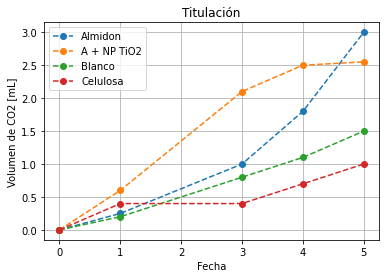

In [69]:
# Graficamos
plt.figure("Titulación")
plt.title("Titulación")
plt.plot(dates, DV_1, "o--", label="Almidon")
plt.plot(dates, DV_3, "o--", label="A + NP TiO2")
plt.plot(dates, DV_4, "o--", label="Blanco")
plt.plot(dates, DV_2, "o--", label="Celulosa")
plt.grid()
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Volumen de CO2 [mL]")
plt.savefig("Titulacion-mL_segunda-medicion.png")
plt.show()

Formula: 

$g=\frac{V C_{HCl}}{V_{muestra}} V_{frasco}44g/mol$

$g=\frac{V 0.4545}{5mL} 0.5L 44g/mol$

con V el volumen de la segunda reaccion

In [70]:
def gramos(x):#meter el volumen de la diferencia
    return x*0.4545*0.5*44/5

def gramos_c(x):
    return x*0.4545*0.75*44/5

gramos1=np.array(gramos(DV_1))
gramos2=np.array(gramos_c(DV_2))
gramos3=np.array(gramos(DV_3))
gramos4=np.array(gramos(DV_4))

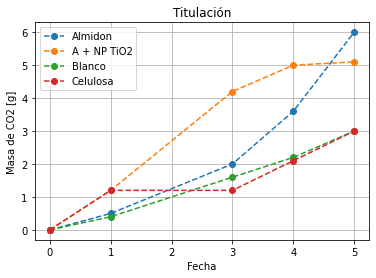

In [71]:
# Graficamos
plt.figure("Titulación")
plt.title("Titulación")
plt.plot(dates, gramos1, "o--", label="Almidon")
plt.plot(dates, gramos3, "o--", label="A + NP TiO2")
plt.plot(dates, gramos4, "o--", label="Blanco")
plt.plot(dates, gramos2, "o--", label="Celulosa")
plt.grid()
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Masa de CO2 [g]")
plt.savefig("Titulacion-g_segunda-medicion.png")
plt.show()